# Seaborn

seaborn是对matplotlib的API封装，能直接对pandas.DataFrame,numpy.ndarry数据集可视化。主要分为：

>* Relational plots(关系图)
    * relplot() : Figure-level,kind='scatter'(默认）
    >> * scatterplot() (kind='scatter') : 散点图
    >> * lineplot() (kind='line') : 线图
>* Distribution plots(分布图)
    * displot() : Figure-lever,kind='hist'（默认)
    >> * histplot() (kind='hist') : 直方图
    >> * kdeplot() (kind='kde') : 使用核密度估计绘制单变量或双变量分布
    >> * ecdfplot() (kind='ecdf') : 经验分布函数
    >> * rugplot(): 边际分布
>* Categorical plots(分类图)
    * catplot() : Figure-level,kind='strip'(默认)
    >> * 分类散点图
            * stripplot() (kind='strip')
            * swarmplot() (kind='swarm)
    >> * 分类分布图
            * boxplot() (kind='box')
            * violinplot() (kind='violin')
            * boxenplot() (kind='boxen')
    >> * 分类估计图
            * pointplot() (kind='point')
            * barplot() (kind='bar')
            * countplot() (kind='count')
>* Regression plots（回归图）
    >> * lmplot()
    >> * regplot()
    >> * residplot()
>* Matrix plots（矩阵图）
    >> * heatmap()
    >> * clustermap()
>* Multi-plot grid(多图网络)
    >> * Facet grids
    >> * Pair grids
    >> * Joint grids

## Relational plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid') # 预设主题有darkgrid，whitegrid，dark，white以及 ticks
tips = pd.read_csv('./seaborn-data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 散点图 scatterplot()

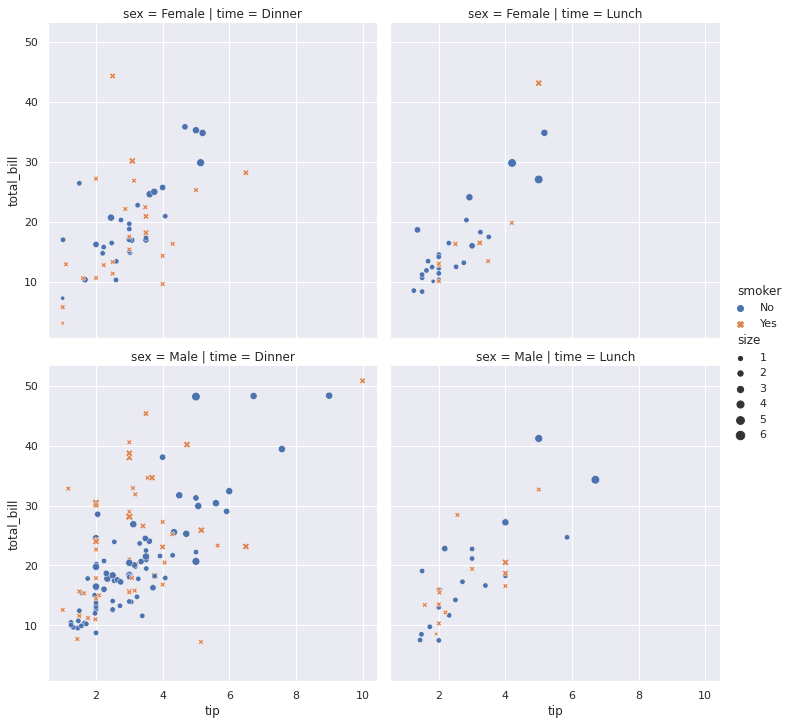

In [2]:
sns.relplot(data=tips,
           x='tip',
           y='total_bill',
           hue='smoker', #添加颜色维度
            col='time', # 行
            row='sex', # 列
            size='size',
            style='smoker',
            kind='scatter'
           );

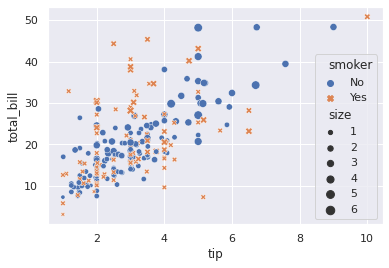

In [3]:
sns.scatterplot(data=tips,
           x='tip',
           y='total_bill',
           hue='smoker', #添加颜色维度
            size='size',
            style='smoker'
           );

In [4]:
dots = pd.read_csv('./seaborn-data/dots.csv')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


### 线图 lineplot()

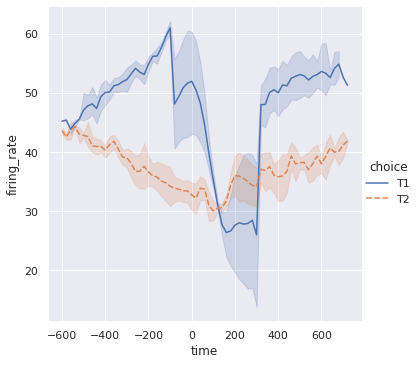

In [5]:
sns.relplot(data=dots,
           x='time',
           y='firing_rate',
           hue='choice',
           style='choice',
           kind='line');

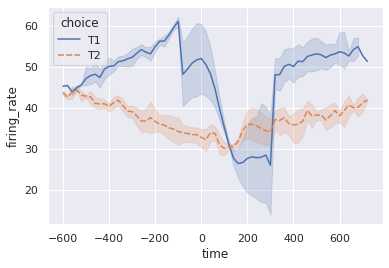

In [6]:
sns.lineplot(data=dots,
           x='time',
           y='firing_rate',
           hue='choice',
           style='choice');

**对x有多个观察值，seaborn 的默认行为是通过绘制平均值及 95%的置信区间**

In [7]:
fmri = pd.read_csv('./seaborn-data/fmri.csv')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


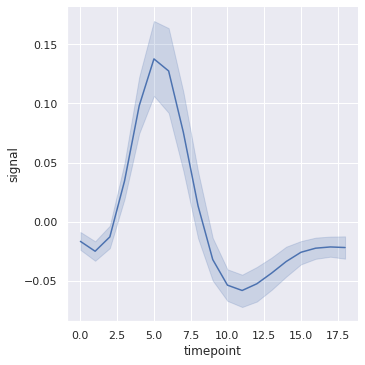

In [8]:
sns.relplot(data=fmri,
           x='timepoint',
           y='signal',
           kind='line');

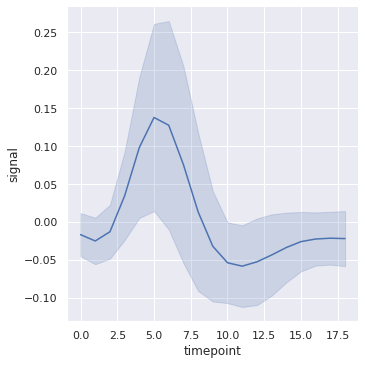

In [9]:
# 绘制标准差（ci=None禁用）
sns.relplot(data=fmri,
           x='timepoint',
           y='signal',
           kind='line',
           ci='sd');

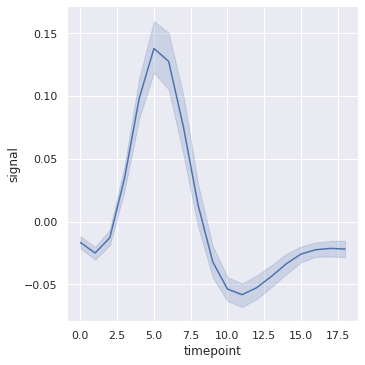

In [10]:
sns.relplot(data=fmri,
           x='timepoint',
           y='signal',
           kind='line',
           ci=80); # 80%置信区间

## Distribution plots

In [11]:
penguins =pd.read_csv('./seaborn-data/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 直方图 histplot()

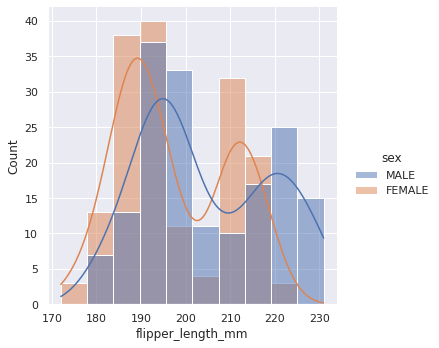

In [12]:
sns.displot(data=penguins,
            x="flipper_length_mm",
            hue='sex',
            kde=True
           );

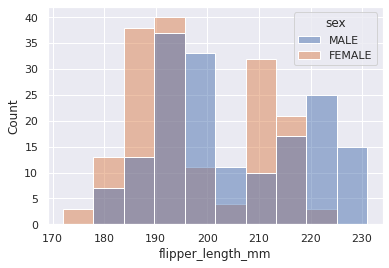

In [13]:
sns.histplot(data=penguins,
            x="flipper_length_mm",
            hue='sex');

### kde plot

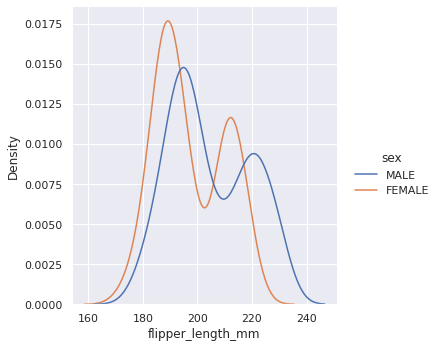

In [14]:
# A kernel density estimate (KDE) plot 
sns.displot(data=penguins,
            x="flipper_length_mm",
            hue='sex',
            kind='kde'
           );

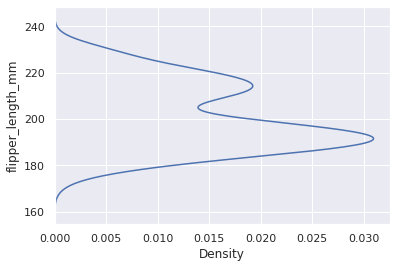

In [15]:
sns.kdeplot(data=penguins,
           y="flipper_length_mm");

### 经验累计分布图 ecdfplot()

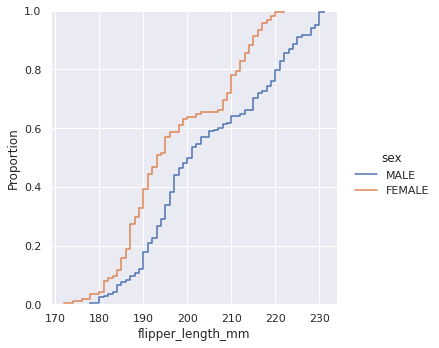

In [16]:
# ecdf
sns.displot(data=penguins,
            x="flipper_length_mm",
           hue='sex',
           kind='ecdf');

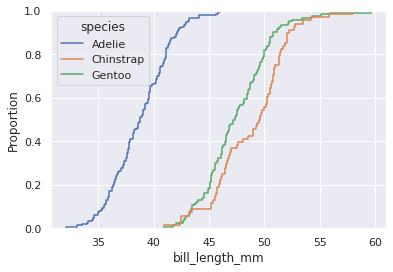

In [17]:
sns.ecdfplot(data=penguins,
             x="bill_length_mm", 
             hue="species");

### 边际分布 rugplot()

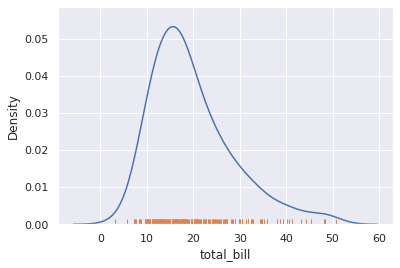

In [18]:
### rugplot() ：边际分布
sns.kdeplot(data=tips, x="total_bill");
sns.rugplot(data=tips, x="total_bill");

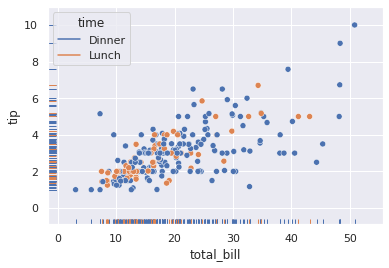

In [19]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='time')
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time");

## Categorical plots

In [20]:
sns.set(style='ticks')
exercise = pd.read_csv('./seaborn-data/exercise.csv')
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


### 分类散点图
#### 有重叠点（strip） stripplot()

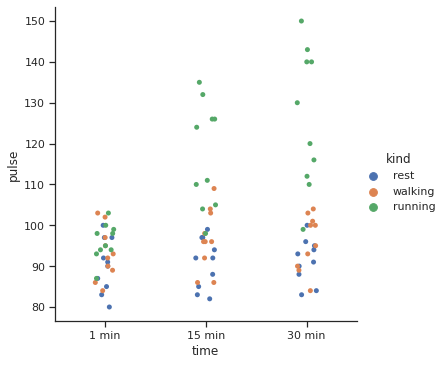

In [21]:
# 分类散点图
sns.catplot(x="time",
            y="pulse", 
            hue="kind", 
            kind='strip',
            data=exercise);

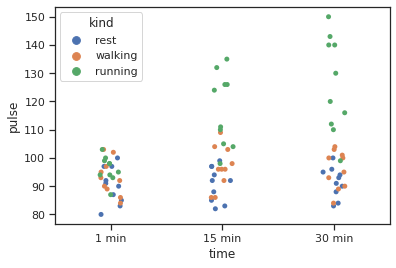

In [22]:
sns.stripplot(data=exercise,
             x='time',
             y='pulse',
             hue='kind');

#### 没有重叠点（swarm） swarmplot()

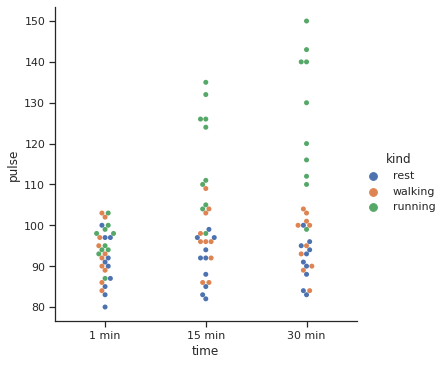

In [23]:
# 没有重叠点的分类散点图
sns.catplot(x="time",
            y="pulse", 
            hue="kind", 
            kind='swarm',
            data=exercise);

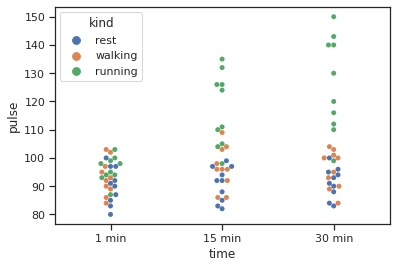

In [24]:
sns.swarmplot(x="time",
            y="pulse", 
            hue="kind", 
            data=exercise);

### 分类分布图
#### 箱线图 boxplot()
它可以显示分布的三个四分位数值以及极值。“胡须”延伸到位于下四分位数和上四分位数的 1.5 IQR 内的点，超出此范围的观察值会独立显示。
$$
IQR = Q_3-Q_1
$$ 
IQR：四分位距

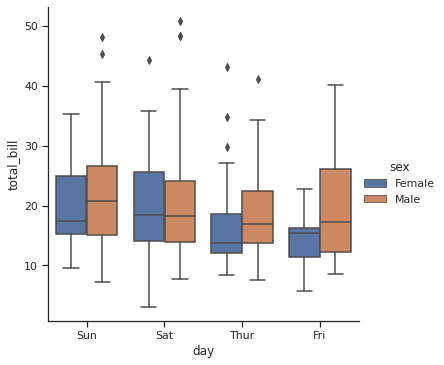

In [25]:
# 箱线图
sns.catplot(x="day",
            y="total_bill",
            hue='sex',
            kind="box", 
            data=tips);

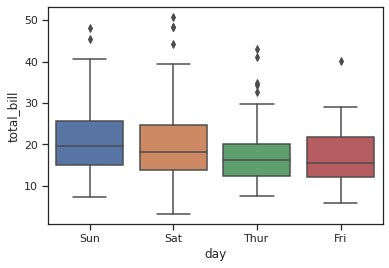

In [26]:
sns.boxplot(data=tips,
           x='day',
           y='total_bill',
           );

#### 小提琴图 violinplot()
**箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高**

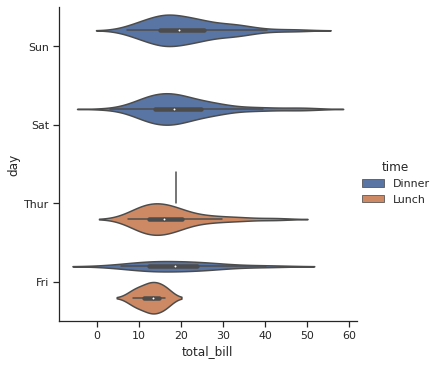

In [27]:
# 小提琴图
sns.catplot(x="total_bill",
            y="day", hue="time",
            kind="violin",
            data=tips);

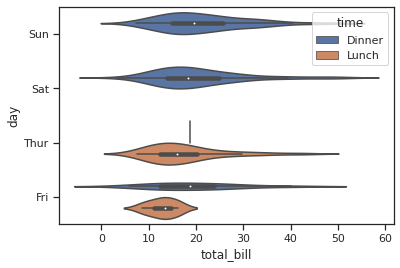

In [28]:
sns.violinplot(x="total_bill",
            y="day", hue="time",
            kind="violin",
            data=tips);

#### 增强版箱线图 boxenplot()
**它为了显示更多信息而对分布的形状进行了优化，比较适合于较大的数据集**

In [29]:
diamonds = pd.read_csv('./seaborn-data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


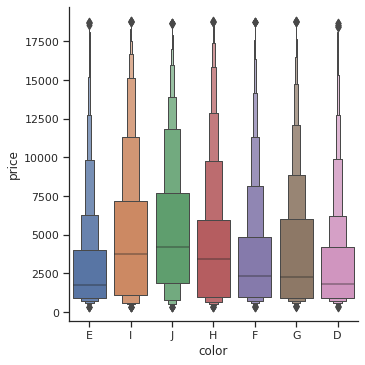

In [30]:
sns.catplot(data=diamonds,
           x='color',
           y='price',
           kind='boxen');

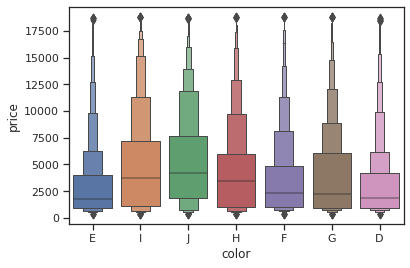

In [31]:
sns.boxenplot(data=diamonds,
             x='color',
             y='price');

In [32]:
titanic = pd.read_csv('./seaborn-data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 分类估计图
#### 条形图 barplot()
在seaborn中，条形图在完整数据集上运行并应用函数来获取估计值（默认情况下取平均值）。当每个类别中有多个观察值时，它还使用自举来计算估计值周围的置信区间，并使用误差条绘制

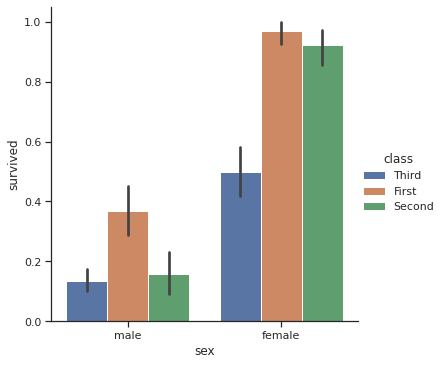

In [33]:
# 条形图
sns.catplot(x="sex",
            y="survived",
            hue="class", 
            kind="bar", 
            data=titanic);

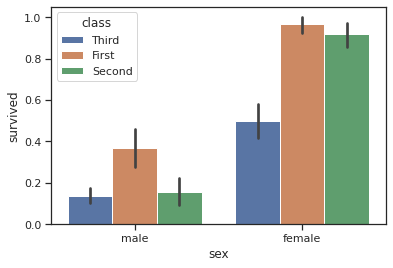

In [34]:
sns.barplot(x="sex",
            y="survived",
            hue="class", 
            data=titanic);

#### count plot 
条形图的一个特例,显示每个类别中的观察数量

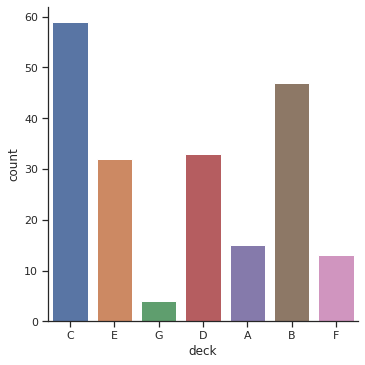

In [35]:
# count 
sns.catplot(x="deck",
           kind="count",
           data=titanic);

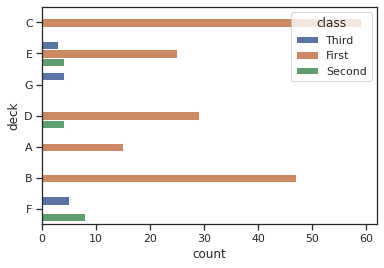

In [36]:
sns.countplot(data=titanic,
             y='deck',
             hue="class");

#### 点图 pointplot()
绘制点估计值和置信区间

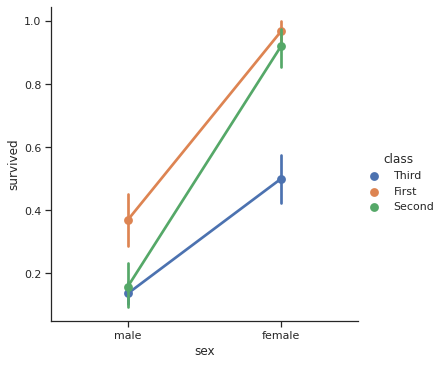

In [37]:
# 点图
sns.catplot(x="sex", 
            y="survived",
            hue="class", 
            kind="point", 
            data=titanic);

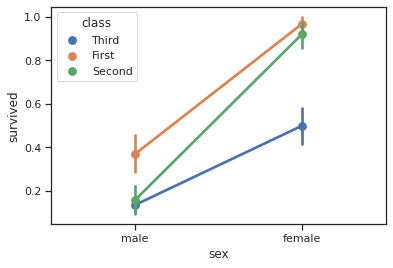

In [38]:
sns.pointplot(data=titanic,
             x='sex',
             y='survived',
             hue='class');

## 多图网络（Multi-plot grids）
* Facet grids (FacetGrid类：用于绘制条件关系的多图网格）
* Pair grids （PairGrid类： 用于在数据集中绘制成对关系的子图网格）
* Joint grids （JoinGrid类： 用于绘制双变量图和边际单变量图）

### Facet grids
首先，使用数据初始化FacetGrid对象并指定将形成网格的行，
列或色调维度的变量名称。这些变量应是离散的，然后对应于变量的不同取值的数据将用于沿该轴的不同小平面的绘制。
例如，假设想要在tips数据集中检查午餐和晚餐小费分布的差异。

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
tips = pd.read_csv('./seaborn-data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


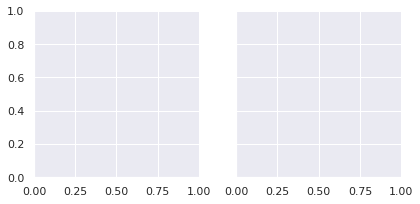

In [40]:
g = sns.FacetGrid(tips, col="time") # 初始化FacetGrid对象

在网格上可视化数据的主要方法是 FacetGrid.map()。为此方法提供绘图函数以及要绘制的数据集变量名作为参数。如：使用直方图绘制每个子集中小费金额的分布。

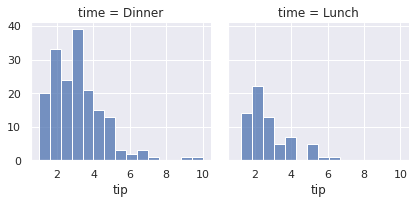

In [41]:
g.map(sns.histplot, "tip");

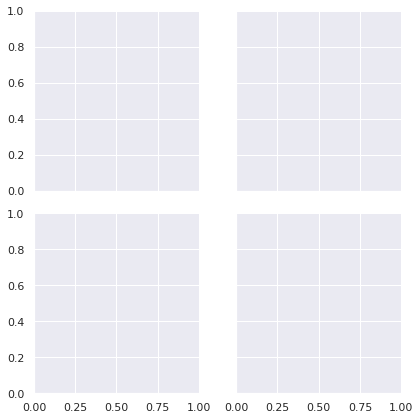

In [42]:
g = sns.FacetGrid(tips,col='sex',row='time',hue='smoker')

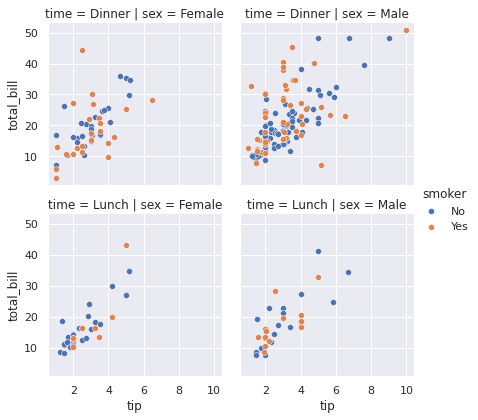

In [43]:
g.map(sns.scatterplot,'tip','total_bill');
g.add_legend();

### Pair grids
绘制成对数据（数值列）关系,每个行和列都分配给一个不同的变量，结果图显示数据集中的每对变量的关系.

In [44]:
iris = pd.read_csv('./seaborn-data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


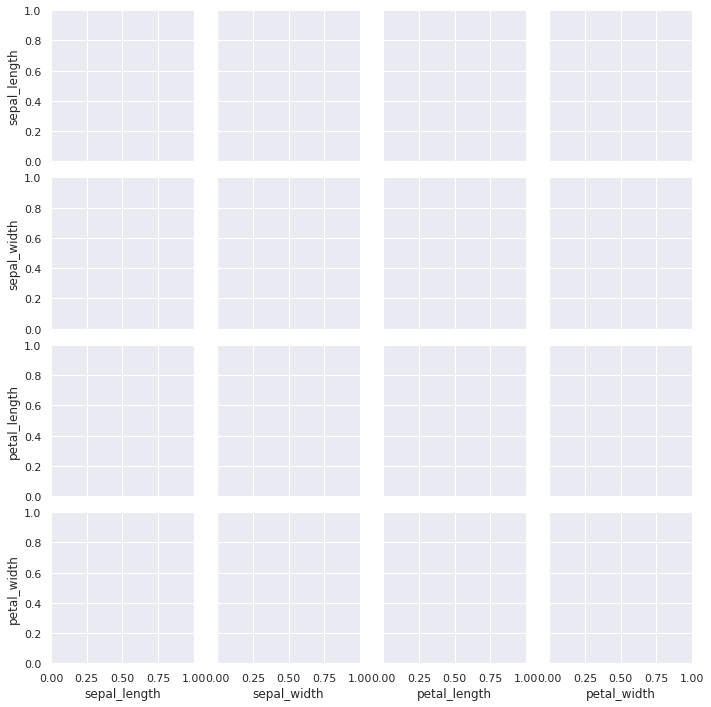

In [45]:
g = sns.PairGrid(iris)

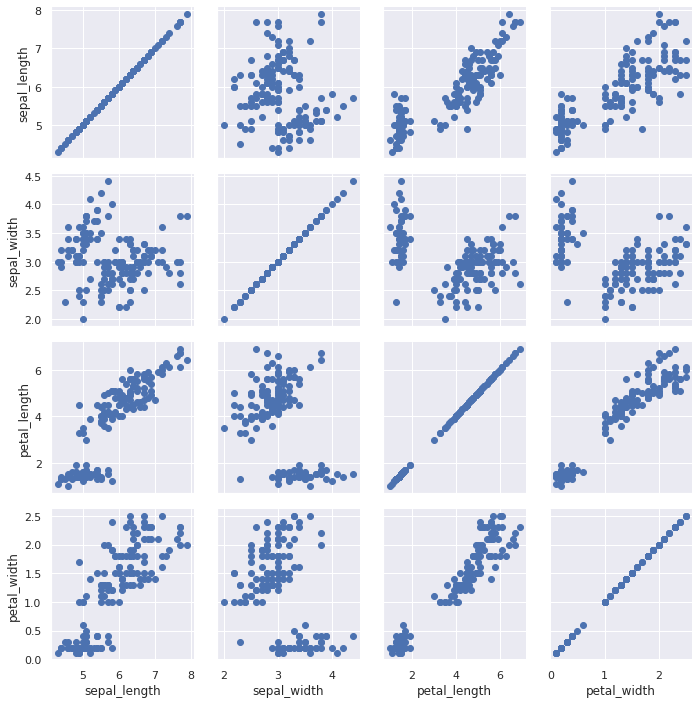

In [46]:
g.map(plt.scatter);

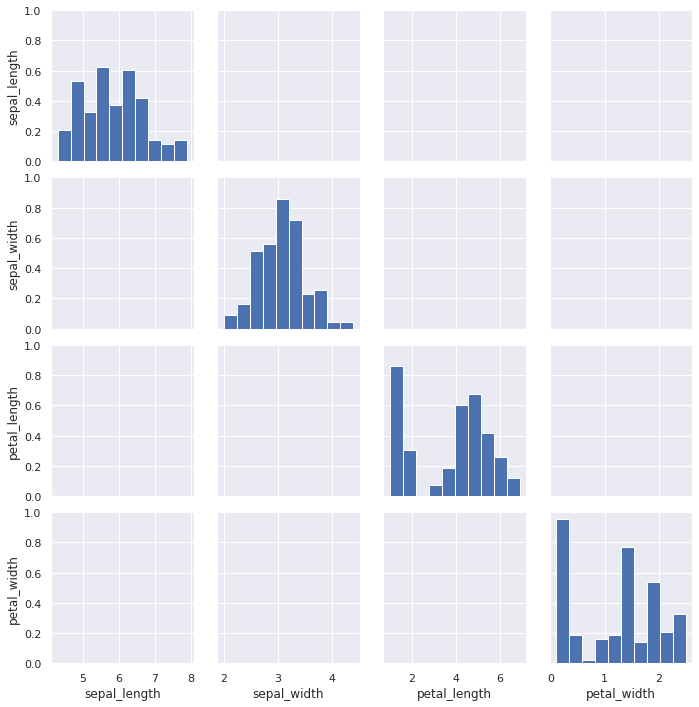

In [47]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist); # 对角线绘制单变量分布直方图

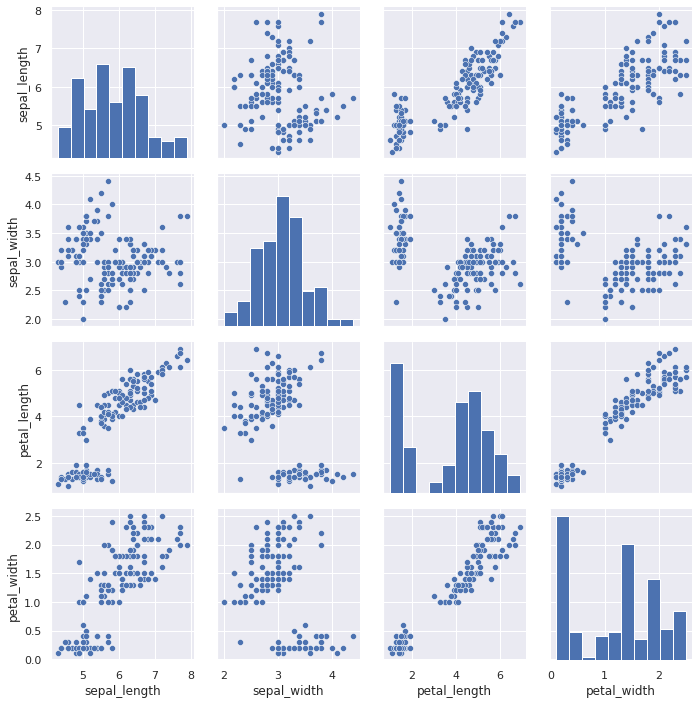

In [48]:
g.map_offdiag(sns.scatterplot); # 非对角线绘制每对变量散点图

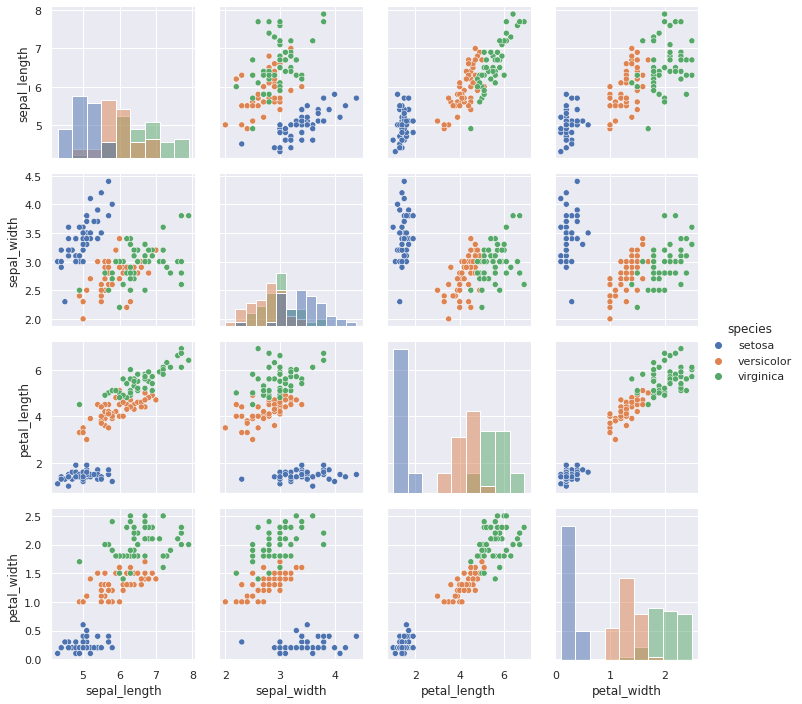

In [49]:
g = sns.PairGrid(iris, hue="species") # 添加一个维度
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

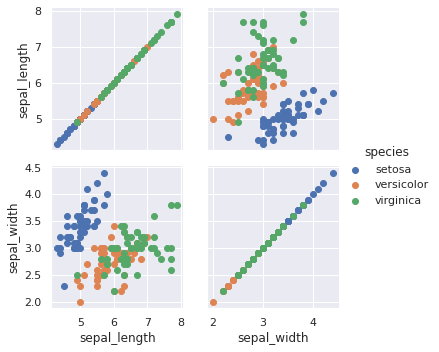

In [50]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species") # 只考虑特定列
g.map(plt.scatter)
g.add_legend();

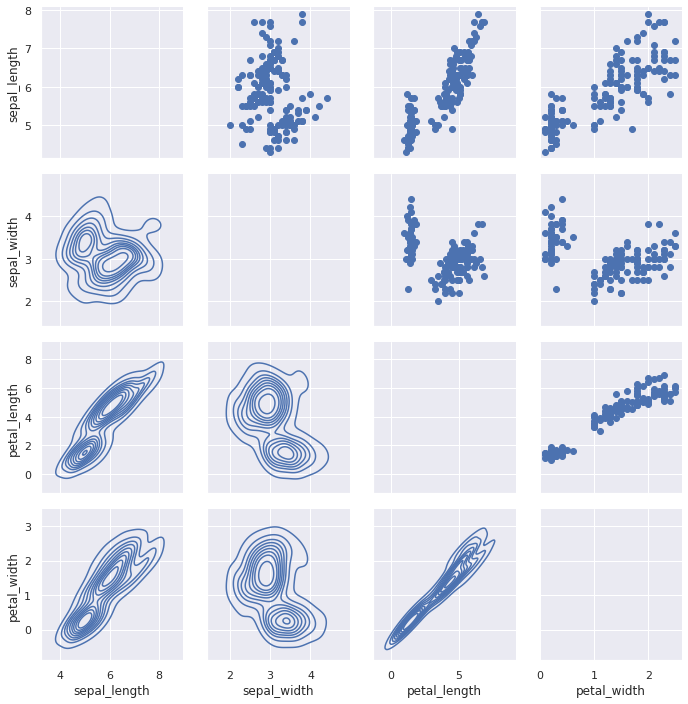

In [51]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter); # 上三角
g.map_lower(sns.kdeplot); # 下三角

* 还可以使用pairplot函数快速绘制

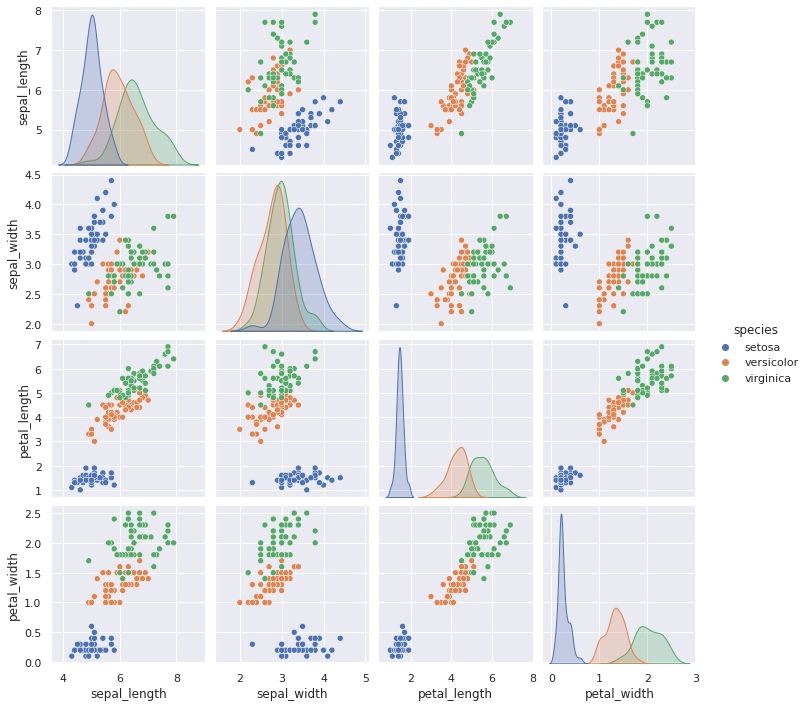

In [52]:
sns.pairplot(iris, hue="species", height=2.5);

### Joint grids
创建一个多图面板，绘制双变量图和边际单变量图。

In [53]:
penguins = pd.read_csv('./seaborn-data/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


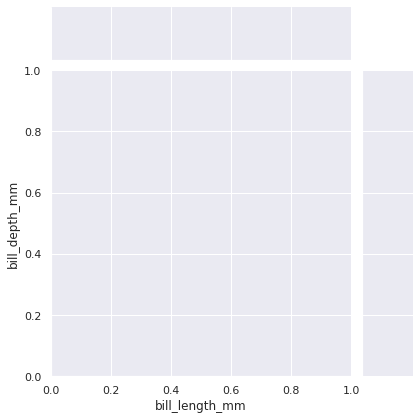

In [54]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm") # 初始化，上右两边缘轴用于绘制边际单变量图

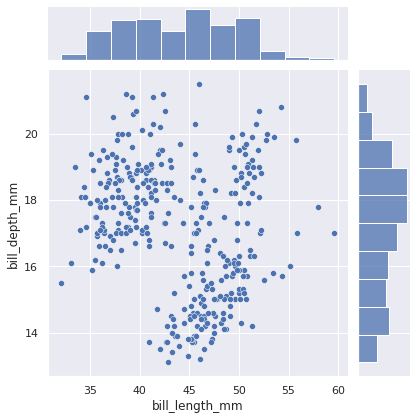

In [55]:
g.plot(sns.scatterplot, sns.histplot); # JoinGrid.plot函数， 接受一对函数(一个用于主轴，另一个用于两个边缘轴)

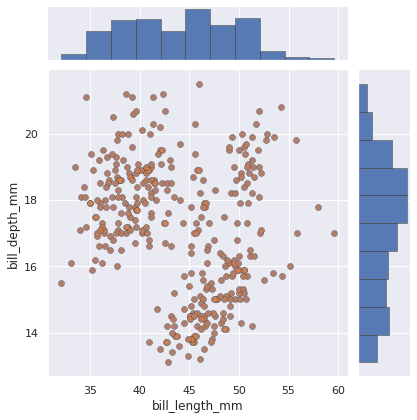

In [56]:
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5);
# plot()函数还接受额外的关键字参数，将它们传递给两个函数

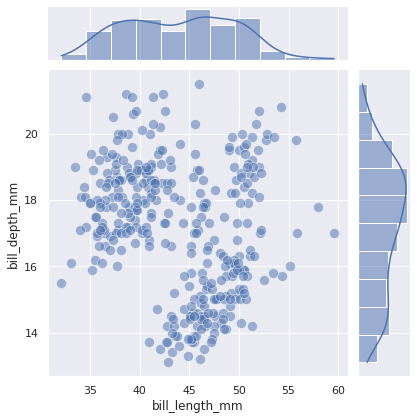

In [57]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5); # 分开传递参数
g.plot_marginals(sns.histplot, kde=True);

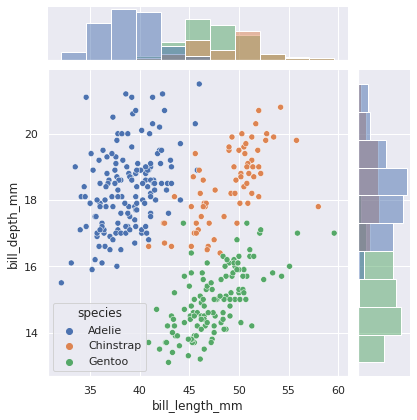

In [58]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species") # 添加维度
g.plot(sns.scatterplot, sns.histplot);

* 可以使用joinplot函数快速绘制

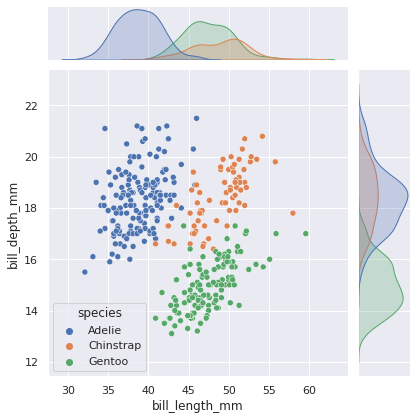

In [59]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species");

## 调色板

In [60]:
current_palette = sns.color_palette() # 默认调色板
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [61]:
sns.set_palette('muted')
sns.color_palette()

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

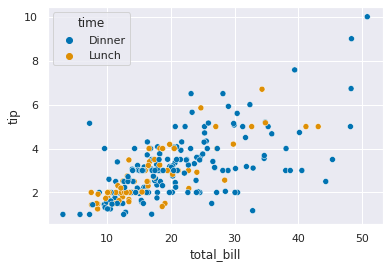

In [62]:
# 默认主题，deep, muted, pastel, bright, dark, 和 colorblind
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='time',
               palette='colorblind');

## 热力图

In [63]:
tip = pd.read_csv('./seaborn-data/tips.csv')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
num_features = ['total_bill','tip','size']

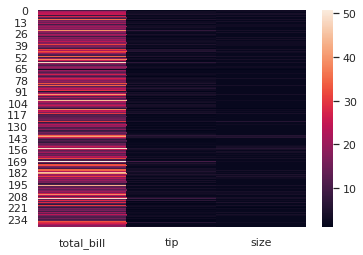

In [65]:
sns.heatmap(data=tip[num_features]);

In [66]:
tip[num_features].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


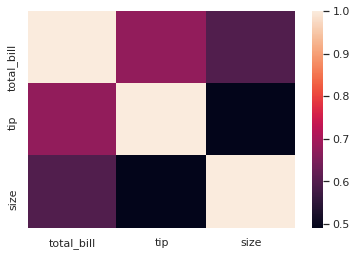

In [68]:
sns.heatmap(data=tip[num_features].corr()); # 相关矩阵